## Processo seletivo 4intelligence - Questão 2 (programação)

#### Thaíza Loiola

### Limpeza e organização

In [ ]:
import pandas as pd

##### 1) Importando o arquivo

In [2]:

df= pd.read_csv('importacao_siscori.csv', encoding="ISO-8859-1", delimiter =',')

##### 2) Organizando as colunas 

In [3]:
#a) transformando a coluna ano mês em data 
#OBS: para colocá-la em formato de data tive que criar artificialmente o dia, ao qual atribuí o valor 01.

import datetime as datetime

df_teste = pd.DataFrame({'yy' : list(df.anomes.astype(str).str[:4]),'mm':list(df.anomes.astype(str).str[-2:])})

df_teste['yy'].astype(int)
df_teste['mm'].astype(int)

df_teste['dd'] =""

n =[]

for i in df_teste['dd']:
    i = '01'
    n.append(i)

df_teste['dd'] = n

df_teste['dd'].astype(int)

df_teste2 = df_teste[["yy","mm","dd"]].copy()

df_teste2.columns = ["year", "month", "day"]
c = pd.to_datetime(df_teste2)
df_teste2['datas'] = c

df['anomes'] = df_teste2['datas'].values

df


,codigo_pedido,anomes,cod_ncm,pais,pais_de_origem,pais_1,pais_de_aquisicao,descricao_do_produto,qtd_total_pedido,unidade_desembaraco
0,1043210000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",280.0,PORTO DE PARANAGUA
1,1042990000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","COOKTOP A GÁS GLP, COM 5 QUEIMADORES, COM POTÊ...",280.0,PORTO DE PARANAGUA
2,1043470000100001,2016-01-01,73211100,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",1136.0,PORTO DE PARANAGUA
3,1086220000700002,2016-01-01,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GLP - REF: RGA-406B ...,2.0,PORTO DE SANTOS
4,1086220000700001,2016-01-01,73211100,399,JAPAO,399,JAPAO,CHURRASQUEIRA A GAS - GN - REF: RGA-406B ...,2.0,PORTO DE SANTOS
...,...,...,...,...,...,...,...,...,...,...
14161,1188030000100016,2020-11-01,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",CV5011WG4A.ABWGBRS MAQUINA DE LAVAR ROUPA TIPO...,1610.0,PORTO DE SANTOS
14162,1188030000100017,2020-11-01,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",FV5011WG4.ABWFBRS MAQUINA DE LAVAR ROUPA(LAVAD...,1610.0,PORTO DE SANTOS
14163,1188030000100018,2020-11-01,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",CV5011WG4A.ABWGBRS MAQUINA DE LAVAR ROUPA TIPO...,1610.0,PORTO DE SANTOS
14164,1188030000100019,2020-11-01,84502090,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",FV5011WG4.ABWFBRS MAQUINA DE LAVAR ROUPA(LAVAD...,1610.0,PORTO DE SANTOS


In [4]:
#b) renomeei os códigos pelos correspondentes

df['cod_ncm'] = df['cod_ncm'].replace([73211100], 'Fogões')

df['cod_ncm'] =df ['cod_ncm'].replace([84501100], 'Máquina de lavar roupa inferior a 10kg')

df['cod_ncm'] = df['cod_ncm'].replace([84502090], 'Máquina de lavar roupa superior a 10kg')



In [5]:
#c)retirei os últimos 5 dígitos da coluna codigo_pedido

for x in df['codigo_pedido']:
    nx = int(x / 100000)
    df['codigo_pedido'] = df['codigo_pedido'].replace([x], nx)

In [6]:
# ordenando as datas
df.sort_values("anomes", inplace = True, ascending=True)
  
# dropping ALL duplicte values
df.drop_duplicates(subset ="codigo_pedido",
                     keep = False, inplace = True)

df
  

,codigo_pedido,anomes,cod_ncm,pais,pais_de_origem,pais_1,pais_de_aquisicao,descricao_do_produto,qtd_total_pedido,unidade_desembaraco
0,10432100001,2016-01-01,Fogões,160,"CHINA, REPUBLICA POP",160,"CHINA, REPUBLICA POP","FOGÃO DE COZINHA, A GAS (GLP), TIPO DE MESA (C...",280.0,PORTO DE PARANAGUA
4278,3515300021,2016-01-01,Máquina de lavar roupa superior a 10kg,791,"TCHECA, REPUBLICA",791,"TCHECA, REPUBLICA","LAVADORA EXTRATORA INDUSTRIAL DE 20,5KG DE CAP...",3.0,PORTO DE SANTOS
4281,4234700001,2016-01-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",WD106UHSAGD/AZ - LAVADORA E SECADORA DE ROUPAS...,918.0,PORTO DE SANTOS
4282,5114900004,2016-01-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP","WF106U4SAWQ/AZ - LAVADORA DE ROUPAS, BRANCA, 1...",153.0,PORTO DE SANTOS
4283,5114900005,2016-01-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP","WF106U4SAWQ/AZ - LAVADORA DE ROUPAS, BRANCA, 1...",153.0,PORTO DE SANTOS
...,...,...,...,...,...,...,...,...,...,...
13862,8431100001,2020-11-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",741,CINGAPURA,COD. IMPORTADOR: LFA11B1; COD. FORNECEDOR: C01...,1071.0,PORTO DE SAO FRANCISCO DO SUL
13861,17794800001,2020-11-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",WW11K6800AW/AZ LAVADORA DE ROUPAS COM CAPACIDA...,153.0,PORTO DE SAO FRANCISCO DO SUL
13853,17742000001,2020-11-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",190,"COREIA (DO SUL), REP",WW11K6800AW/AZ LAVADORA DE ROUPAS COM CAPACIDA...,153.0,PORTO DE SAO FRANCISCO DO SUL
13840,8467800001,2020-11-01,Máquina de lavar roupa superior a 10kg,160,"CHINA, REPUBLICA POP",741,CINGAPURA,COD. IMPORTADOR: LSD11B2; COD. FORNECEDOR: MFC...,918.0,PORTO DE SAO FRANCISCO DO SUL


### Análise dos dados

In [7]:
pd.to_numeric(df['qtd_total_pedido']) 

0         280.0
4278        3.0
4281      918.0
4282      153.0
4283      153.0
          ...  
13862    1071.0
13861     153.0
13853     153.0
13840     918.0
14165      45.0
Name: qtd_total_pedido, Length: 4941, dtype: float64

In [8]:
total = df['qtd_total_pedido'].sum()
total

1052421.324

In [9]:
n_by_fogoes = df[df["cod_ncm"] =='Fogões']
n_by_fogoes


totalfogoes = n_by_fogoes['qtd_total_pedido'].sum()
totalfogoes

338139.2

In [10]:
n_by_maqinf = df[df["cod_ncm"] =='Máquina de lavar roupa inferior a 10kg']
n_by_maqinf
totalmaqinf = n_by_maqinf['qtd_total_pedido'].sum()
totalmaqinf

3543.0

In [11]:
n_by_maqsup = df[df["cod_ncm"] =='Máquina de lavar roupa superior a 10kg']
n_by_maqsup
totalmaqsup = n_by_maqsup['qtd_total_pedido'].sum()
totalmaqsup

710739.1240000001

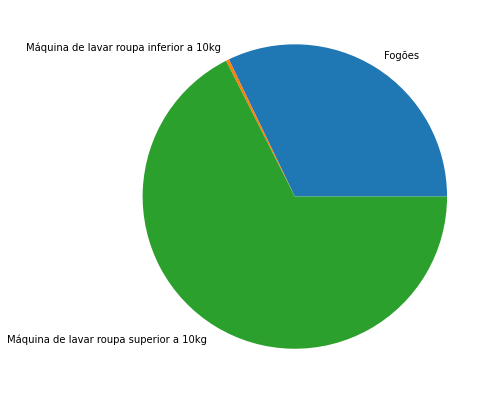

In [12]:
#gráfico de pizza para visualizar as proporções de importação de cada produto

from matplotlib import pyplot as plt

produtos = ['Fogões', 'Máquina de lavar roupa inferior a 10kg', 'Máquina de lavar roupa superior a 10kg']
  
data = [totalfogoes, totalmaqinf, totalmaqsup]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = produtos)

#plt.savefig('graficopizza.png')

# show plot
plt.show()


## (a) Qual produto tem maior participação ao considerarmos as séries históricas de importação?

Conforme é possível ver no gráfico acima o produtos com maior participação nas séries históricas de importação são as máquinas de lavar superiores a 10 kg.


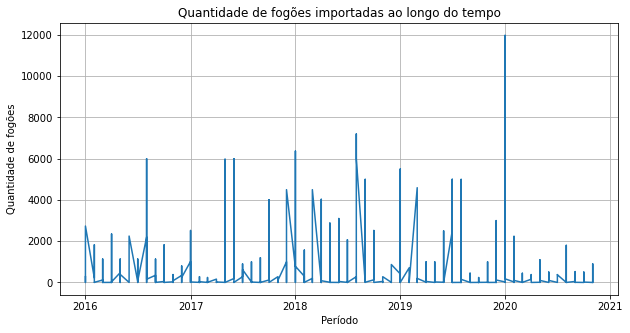

In [13]:
x = n_by_fogoes["anomes"]
y = n_by_fogoes["qtd_total_pedido"]
plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.grid()
plt.xlabel('Período')
plt.ylabel('Quantidade de fogões')
plt.title('Quantidade de fogões importadas ao longo do tempo')
plt.show()

### (b) Como se dá a dinâmica, ao longo do tempo, das séries para cada produto? Descreva.

Para fogões é evidente que durante o período eles são comprados com frequência, mas tem destacados picos no final de cada ano. Talvez seja essa uma tendência sazonal dos consumidores por se aproximar o natal (período de maior compras), além de que as famílias recebem seus 13ºs, podendo assim haver uma possível correlação/causalidade entre os 2 eventos.

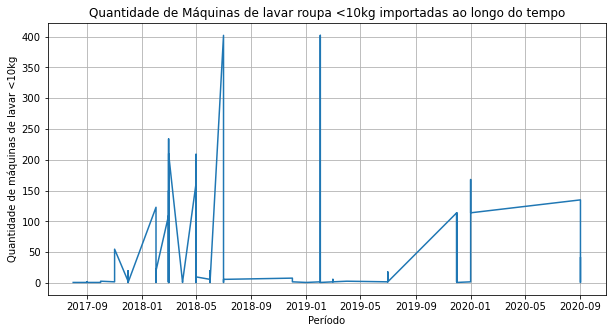

In [14]:
x = n_by_maqinf["anomes"]
y = n_by_maqinf["qtd_total_pedido"]
plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.grid()
plt.xlabel('Período')
plt.ylabel('Quantidade de máquinas de lavar <10kg')
plt.title('Quantidade de Máquinas de lavar roupa <10kg importadas ao longo do tempo')
plt.show()

Por outro lado, quando avaliamos a compra de máquinas de lavar é visto que as pessoas compram com maior frequência máquinas que comportam mais de 10kgs e de forma até mais bem distribuída ao longo do ano: pode-se notar que os picos de compra ocorrem mais ou menos de 3 em 3 meses. Por outro lado, as máquinas que comportam apenas até 10kgs não parecem ter um padrão no regime de compras, o que poderia talvez ser explicado por ser um bem inferior: o indivíduo quando tem um pouco mais de renda prefere comprar uma máquina que comporte mais de 10kgs do que uma com menor capacidade. Ele só vai comprar a que tem uma menor capacidade se ele realmente não tiver como comprar uma melhor (caso a  sua restrição orçamentária não permita que ele compre a outra).


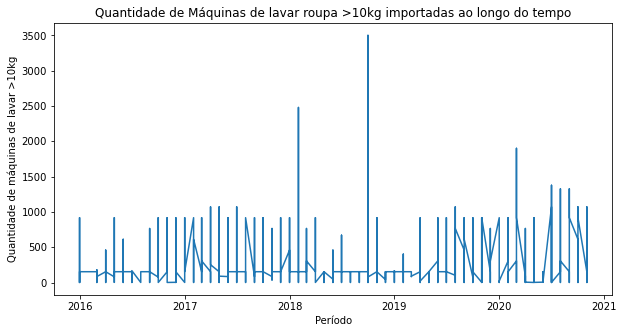

In [15]:
x = n_by_maqsup["anomes"]
y = n_by_maqsup["qtd_total_pedido"]
plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.xlabel('Período')
plt.ylabel('Quantidade de máquinas de lavar >10kg')
plt.title('Quantidade de Máquinas de lavar roupa >10kg importadas ao longo do tempo')
plt.show()

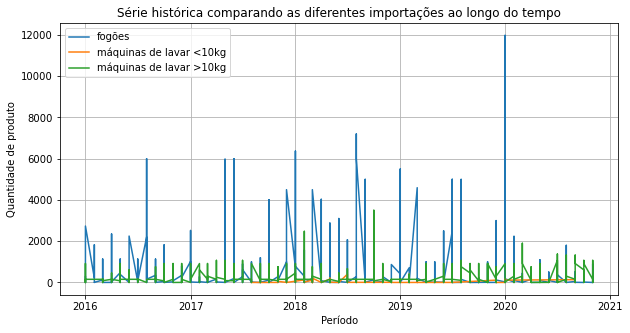

In [51]:
x = n_by_fogoes["anomes"]
y = n_by_fogoes["qtd_total_pedido"] 
x1 = n_by_maqinf["anomes"]
y1 = n_by_maqinf["qtd_total_pedido"]
x2 = n_by_maqsup["anomes"]
y2 = n_by_maqsup["qtd_total_pedido"]



plt.figure(figsize = (10,5))
plt.plot(x, y, )
plt.plot(x1, y1, )
plt.plot(x2, y2, )

plt.legend(['fogões', 'máquinas de lavar <10kg', 'máquinas de lavar >10kg'])

plt.grid()
plt.xlabel('Período')
plt.ylabel('Quantidade de produto')
plt.title('Série histórica comparando as diferentes importações ao longo do tempo')
plt.show()

##### c) Gráficos para os países de origem e de aquisição

In [19]:
norpaises_by_fogoes =pd.DataFrame(n_by_fogoes.groupby(["cod_ncm", "pais_de_origem"])["qtd_total_pedido"].sum()).reset_index()

norpaises_by_fogoes.sort_values("qtd_total_pedido", inplace = True, ascending=False)
  

In [20]:
naqpaises_by_fogoes = pd.DataFrame(n_by_fogoes.groupby(["cod_ncm", "pais_de_aquisicao"])["qtd_total_pedido"].sum()).reset_index()

naqpaises_by_fogoes.sort_values("qtd_total_pedido", inplace = True, ascending=False)
  


In [87]:
def plota(df,nome_coluna,titulo_grafico):

    name = df[f'{nome_coluna}']
    price = df['qtd_total_pedido']

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(name, price)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(f'{titulo_grafico}',
                 loc ='left', )

    # Add Text watermark
    fig.text(0.9, 0.15, f'{titulo_grafico}', fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)

    # Show Plot
    plt.show()

## (c) Há diferença na participação dos países exportadores quando olhamos para ’pais_de_origem’ ou para ’pais_de_aquisicao’?

Há diferenças sim na quantidades totais de fogões importados em relação a seu país de origem e país de aquisição. Nos 3 próximos gráficos é possível visualizar que os fogões importados tem a China e Hong Kong ocupando respectivamente o primeiro e segundo postos tanto como país de origem bem como país de aquisição do bem. A terceira posição de origem dos fogões é ocupada pela Itália, porém ela ocupa a quarta posição em relação ao país de aquisição. Ao passo que a quarta posição de origem dos fogões é ocupada pela Colômbia, porém ela ocupa a terceira posição em relação ao país de aquisição. Por fim, é notável como a quantidade total de fogões importados estão bem mais distribuídos em relação à quantidade de nações de aquisição do produto do que origem do produto. O que poderia sinalizar que as nações que concentram a origem do fogão tem boas relações comerciais com vários outros países de modo a ramificar ainda mais os “entrepostos comerciais” em que a sua mercadoria pode ser adquirida.


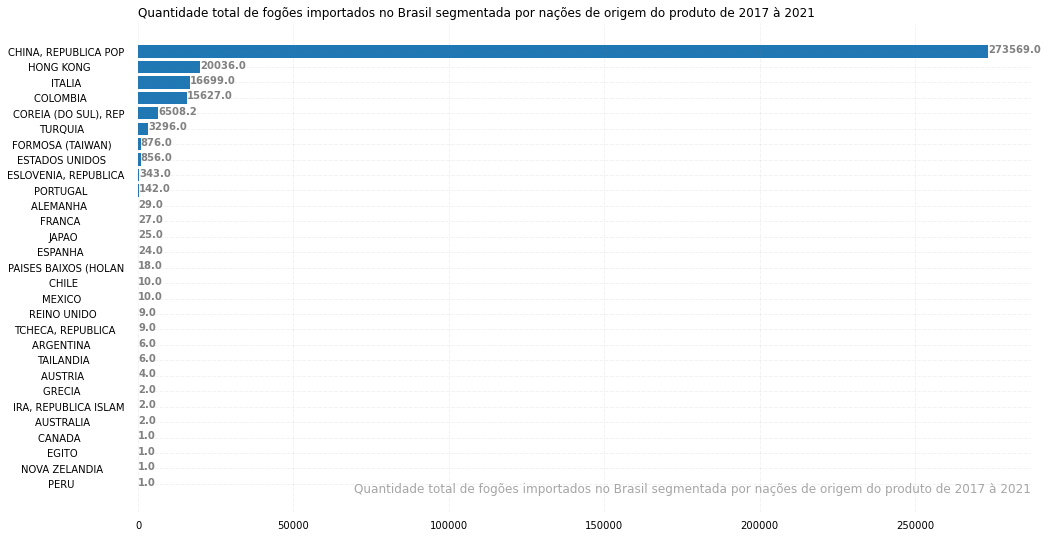

In [88]:
plota(norpaises_by_fogoes,'pais_de_origem', 'Quantidade total de fogões importados no Brasil segmentada por nações de origem do produto de 2017 à 2021')

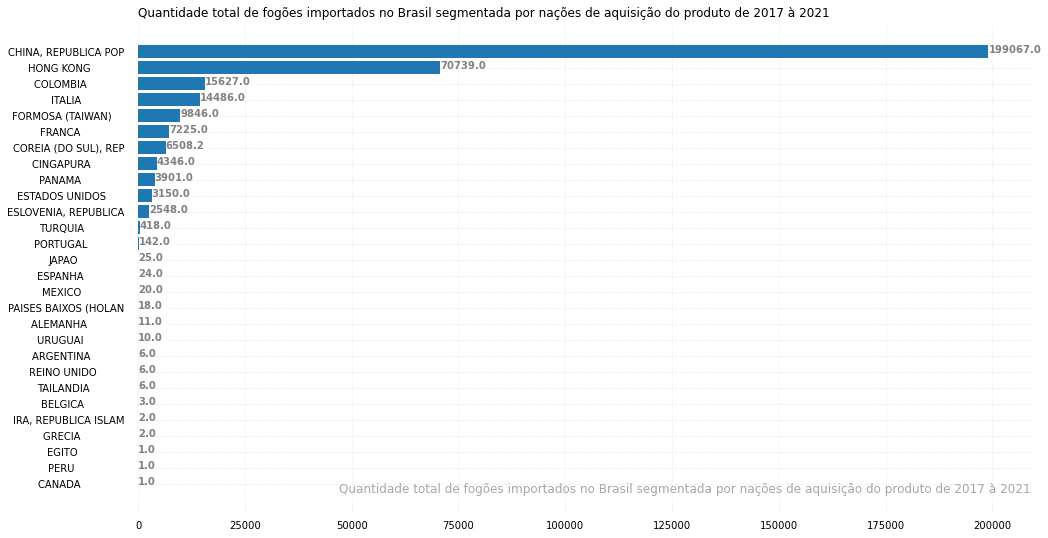

In [89]:
plota(naqpaises_by_fogoes,'pais_de_aquisicao', 'Quantidade total de fogões importados no Brasil segmentada por nações de aquisição do produto de 2017 à 2021')

In [61]:
norpaises_by_fogoes['tipo'] = 'ORIGEM'
naqpaises_by_fogoes['tipo'] = 'AQUISICAO'

In [62]:
colunas_paises = pd.concat([norpaises_by_fogoes.pais_de_origem,naqpaises_by_fogoes.pais_de_aquisicao]).reset_index(drop=True)
colunas_qtd_total_pedido = pd.concat([norpaises_by_fogoes.qtd_total_pedido,naqpaises_by_fogoes.qtd_total_pedido]).reset_index(drop=True)
colunas_tipo = pd.concat([norpaises_by_fogoes.tipo,naqpaises_by_fogoes.tipo]).reset_index(drop=True)

In [63]:
df = pd.DataFrame()
df['paises'] = colunas_paises
df['qtd_total_pedido'] = colunas_qtd_total_pedido
df['tipo'] = colunas_tipo


In [64]:
import seaborn as sns

Text(0.5, 1.0, 'Fogões: PAÍS DE ORIGEM X DE AQUISIÇÃO')

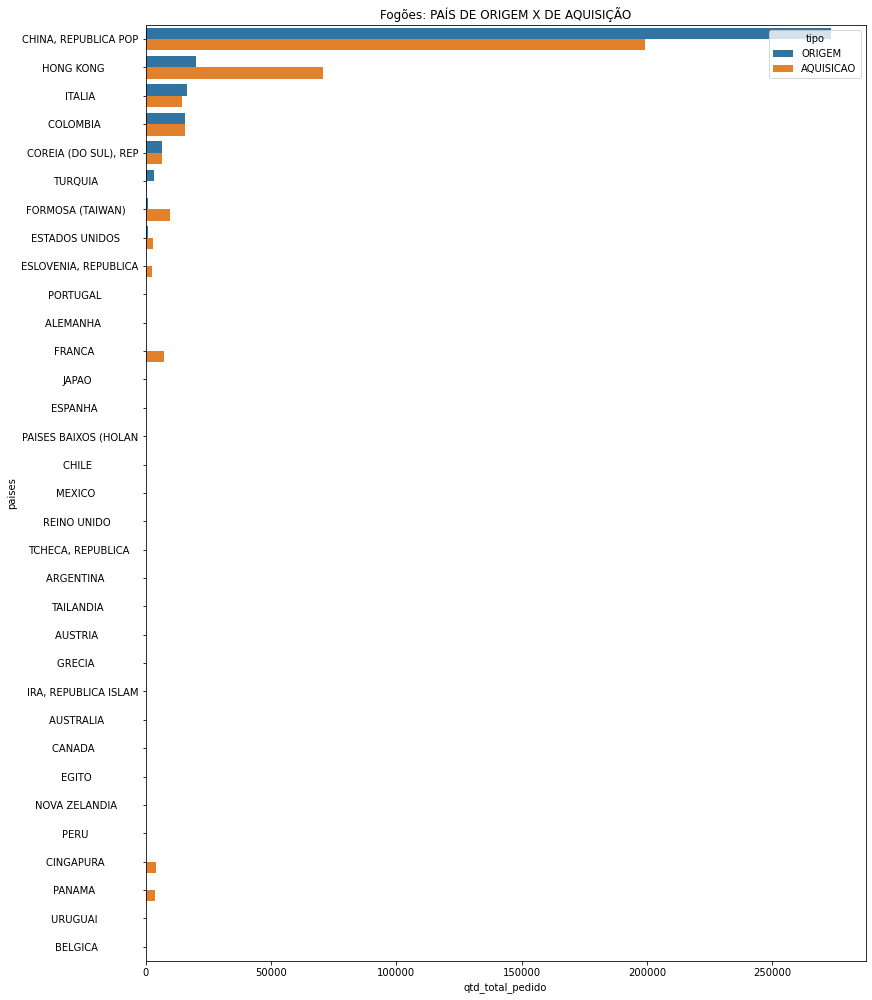

In [79]:
fig = plt.figure(figsize=(10,13))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='qtd_total_pedido', y='paises', hue='tipo', data=df, ax=ax);
ax.set_title('Fogões: PAÍS DE ORIGEM X DE AQUISIÇÃO')

In [80]:
norpaises_by_maqinf =pd.DataFrame(n_by_maqinf.groupby(["cod_ncm", "pais_de_origem"])["qtd_total_pedido"].sum()).reset_index()

norpaises_by_maqinf.sort_values("qtd_total_pedido", inplace = True, ascending=False)
  

In [81]:
naqpaises_by_maqinf =pd.DataFrame(n_by_maqinf.groupby(["cod_ncm", "pais_de_aquisicao"])["qtd_total_pedido"].sum()).reset_index()

naqpaises_by_maqinf.sort_values("qtd_total_pedido", inplace = True, ascending=False)


Em relação a máquinas de lavar <10kg importadas temos a Coreia do Sul e Tailândia ocupando respectivamente a primeira e a segunda posição tanto como país de origem bem como país de aquisição do bem. Enquanto isso, a Argentina se verifica sendo tanto um grande polo de país de aquisição, bem como de país de origem das máquinas <10kg.


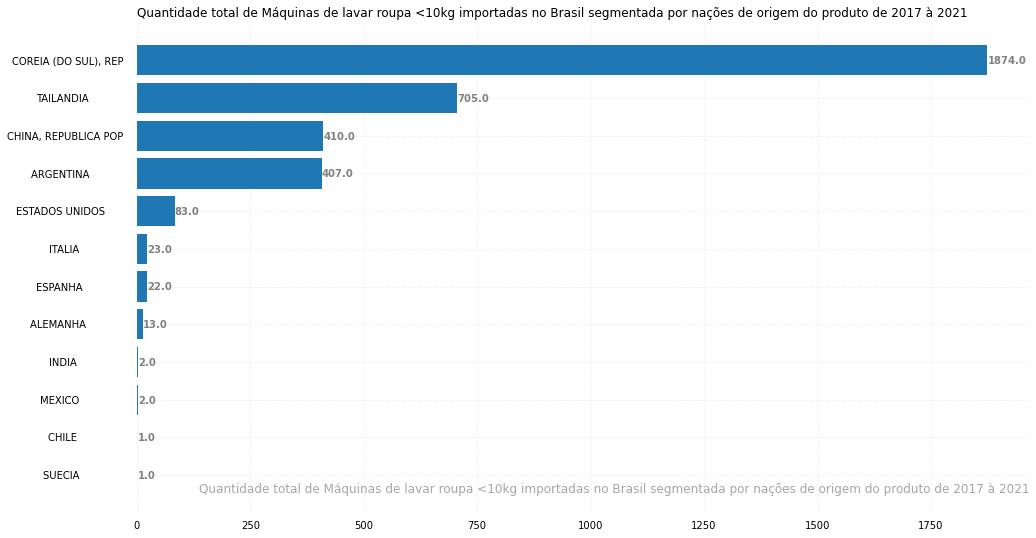

In [90]:
plota(norpaises_by_maqinf,'pais_de_origem', 'Quantidade total de Máquinas de lavar roupa <10kg importadas no Brasil segmentada por nações de origem do produto de 2017 à 2021' )

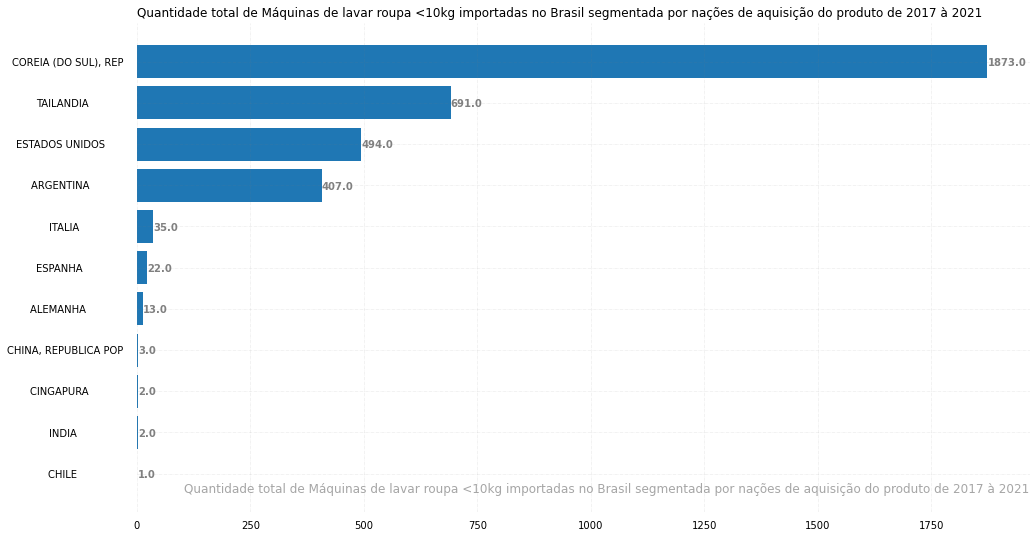

In [91]:
plota(naqpaises_by_maqinf,'pais_de_aquisicao', 'Quantidade total de Máquinas de lavar roupa <10kg importadas no Brasil segmentada por nações de aquisição do produto de 2017 à 2021')

In [103]:
norpaises_by_maqinf['tipo'] = 'ORIGEM'
naqpaises_by_maqinf['tipo'] = 'AQUISICAO'

In [104]:
colunas_paises2 = pd.concat([norpaises_by_maqinf.pais_de_origem,naqpaises_by_maqinf.pais_de_aquisicao]).reset_index(drop=True)
colunas_qtd_total_pedido2 = pd.concat([norpaises_by_maqinf.qtd_total_pedido,naqpaises_by_maqinf.qtd_total_pedido]).reset_index(drop=True)
colunas_tipo2 = pd.concat([norpaises_by_maqinf.tipo,naqpaises_by_maqinf.tipo]).reset_index(drop=True)

In [105]:
df2 = pd.DataFrame()
df2['paises'] = colunas_paises2
df2['qtd_total_pedido'] = colunas_qtd_total_pedido2
df2['tipo'] = colunas_tipo2



Text(0.5, 1.0, 'Máquinas de lavar <10kg: PAÍS DE ORIGEM X DE AQUISIÇÃO')

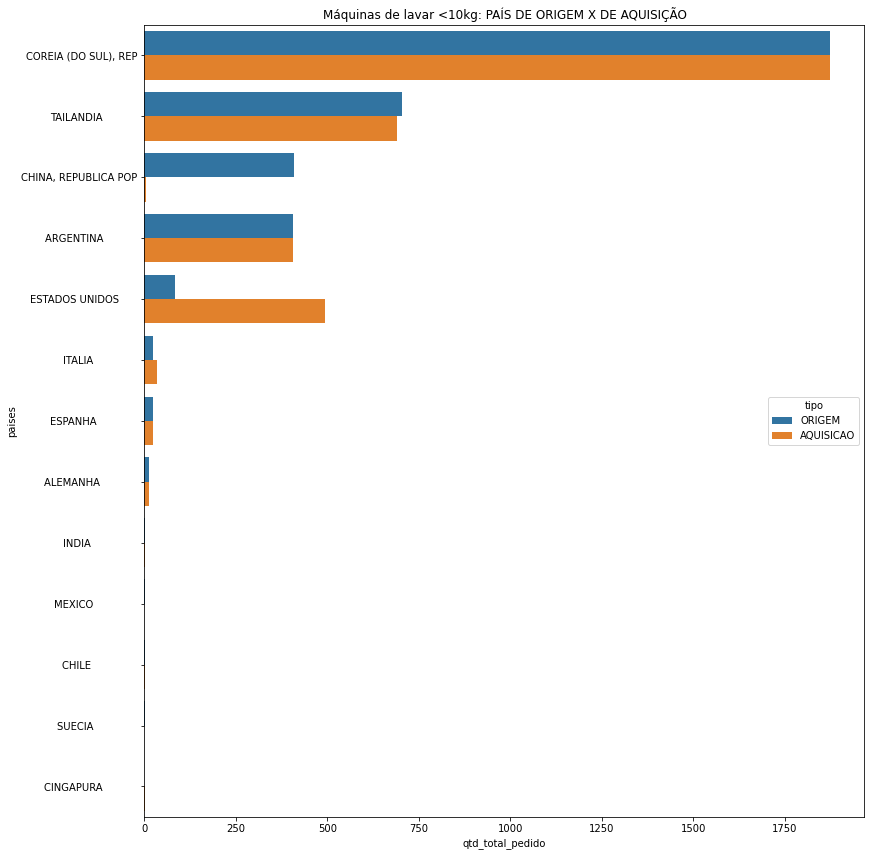

In [109]:
fig = plt.figure(figsize=(10,11))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='qtd_total_pedido', y='paises', hue='tipo', data=df2, ax=ax);
ax.set_title('Máquinas de lavar <10kg: PAÍS DE ORIGEM X DE AQUISIÇÃO')

In [42]:
norpaises_by_maqsup =pd.DataFrame(n_by_maqsup.groupby(["cod_ncm", "pais_de_origem"])["qtd_total_pedido"].sum()).reset_index()

norpaises_by_maqsup.sort_values("qtd_total_pedido", inplace = True, ascending=False)
  

In [43]:
naqpaises_by_maqsup =pd.DataFrame(n_by_maqsup.groupby(["cod_ncm", "pais_de_aquisicao"])["qtd_total_pedido"].sum()).reset_index()

naqpaises_by_maqsup.sort_values("qtd_total_pedido", inplace = True, ascending=False)

Por outro lado, quando falamos das importações das máquinas de lavar com capacidade superior a 10kgs, temos novamente a China como grande polo tanto de origem, porém como polo de aquisição do produto lidera a Coreia do Sul. Talvez isso seja explicado pelo baixo custo de mão de obra Chinês e a proximidade geográfica entre os dois países, o que potencialmente seria conveniente para as empresas sul-coreanas terceirizarem esse trabalho aos chineses.

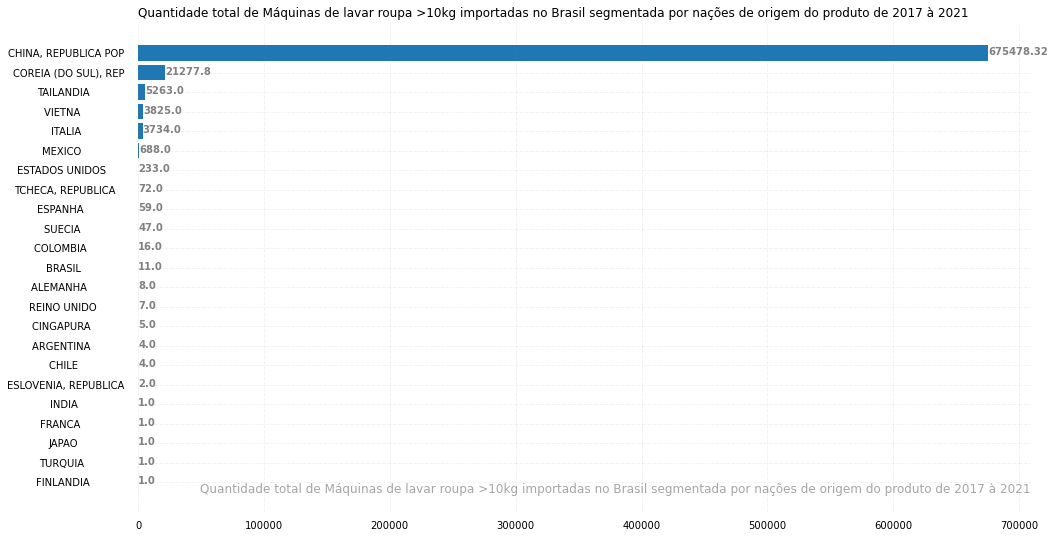

In [97]:
plota(norpaises_by_maqsup,'pais_de_origem','Quantidade total de Máquinas de lavar roupa >10kg importadas no Brasil segmentada por nações de origem do produto de 2017 à 2021')

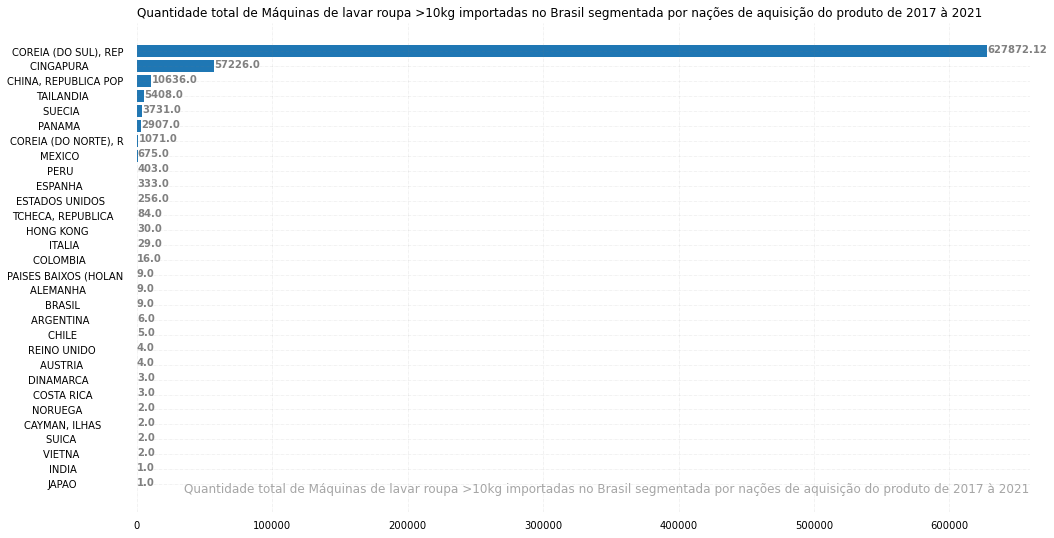

In [98]:
plota(naqpaises_by_maqsup,'pais_de_aquisicao', 'Quantidade total de Máquinas de lavar roupa >10kg importadas no Brasil segmentada por nações de aquisição do produto de 2017 à 2021')

In [110]:
norpaises_by_maqsup['tipo'] = 'ORIGEM'
naqpaises_by_maqsup['tipo'] = 'AQUISICAO'

In [111]:
colunas_paises3 = pd.concat([norpaises_by_maqsup.pais_de_origem,naqpaises_by_maqsup.pais_de_aquisicao]).reset_index(drop=True)
colunas_qtd_total_pedido3 = pd.concat([norpaises_by_maqsup.qtd_total_pedido,naqpaises_by_maqsup.qtd_total_pedido]).reset_index(drop=True)
colunas_tipo3 = pd.concat([norpaises_by_maqsup.tipo,naqpaises_by_maqsup.tipo]).reset_index(drop=True)

In [112]:
df3 = pd.DataFrame()
df3['paises'] = colunas_paises3
df3['qtd_total_pedido'] = colunas_qtd_total_pedido3
df3['tipo'] = colunas_tipo3



Text(0.5, 1.0, 'Máquinas de lavar >10kg: PAÍS DE ORIGEM X DE AQUISIÇÃO')

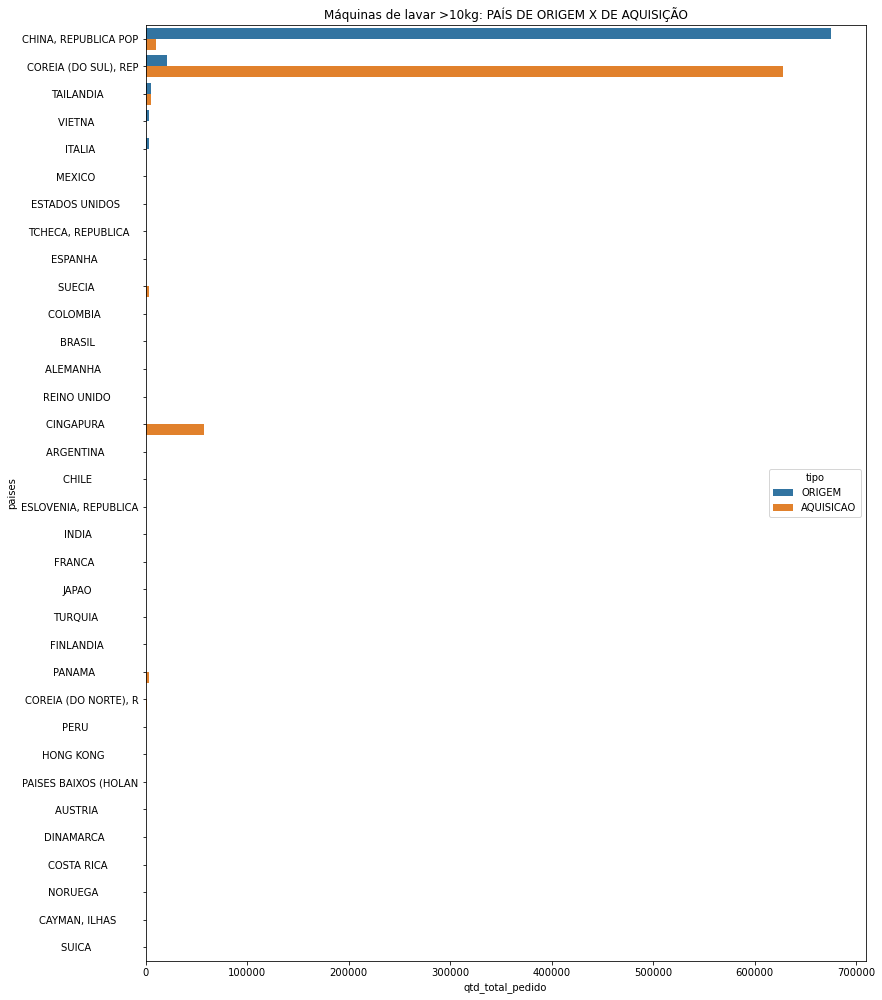

In [120]:
fig = plt.figure(figsize=(10,13))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x='qtd_total_pedido', y='paises', hue='tipo', data=df3, ax=ax);
ax.set_title('Máquinas de lavar >10kg: PAÍS DE ORIGEM X DE AQUISIÇÃO')